## Análise de filmes exibidos no Brasil entre 2009 e 2019

In [1]:
# Fonte dos dados: https://oca.ancine.gov.br/cinema

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('2120_.xls', skiprows=2, skipfooter=20)

In [10]:
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,E1700453800000,Ficção,França,Estrangeira,2018-01-04 00:00:00,Imovision,Distribuição Nacional,10,70
1,2019,3 Faces,E1800494900000,Ficção,Irã,Estrangeira,2019-04-04 00:00:00,Imovision,Distribuição Nacional,6289,103805
2,2019,45 Dias Sem Você,B1800586000000,Ficção,Brasil,Brasileira,2019-05-16 00:00:00,O2 Play,Distribuição Nacional,3303,31295
3,2019,A 100 Passos De Um Sonho,E1402795100000,Ficção,Estados Unidos,Estrangeira,2014-08-28 00:00:00,Disney,Distribuição Internacional,69,4186
4,2019,A Abelhinha Maya - O Filme,E1800136100000,Animação,Alemanha,Estrangeira,2018-05-17 00:00:00,Playarte,Distribuição Nacional,402,3531


In [29]:
df.dtypes

Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Público no ano de exibição         object
Renda (R$) no ano de exibição      object
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Ano de exibição                  7081 non-null   int64 
 1   Título da obra                   7081 non-null   object
 2   CPB/ROE                          7081 non-null   object
 3   Gênero                           7081 non-null   object
 4   País(es) produtor(es) da obra    7081 non-null   object
 5   Nacionalidade da obra            7081 non-null   object
 6   Data de lançamento               7081 non-null   object
 7   Empresa distribuidora            7081 non-null   object
 8   Origem da empresa distribuidora  7081 non-null   object
 9   Público no ano de exibição       7081 non-null   object
 10  Renda (R$) no ano de exibição    7081 non-null   object
dtypes: int64(1), object(10)
memory usage: 608.6+ KB


In [1]:
# df['Data de lançamento'] = pd.to_datetime(df['Data de lançamento'])

In [12]:
df['Data de lançamento'].value_counts()

Relançamento           198
2015-12-03 00:00:00     33
2012-12-21 00:00:00     33
2013-11-29 00:00:00     29
2012-11-02 00:00:00     27
                      ... 
2018-03-20 00:00:00      1
2005-07-22 00:00:00      1
2003-10-31 00:00:00      1
2014-01-18 00:00:00      1
2014-07-04 00:00:00      1
Name: Data de lançamento, Length: 878, dtype: int64

In [13]:
df[df['Data de lançamento'] == 'Relançamento'].head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
6,2019,A Bela da Tarde,E1700492900000,Ficção,"França, Itália",Estrangeira,Relançamento,Zeta Filmes,Distribuição Nacional,14,253
278,2019,Gritos e Sussurros,E1600273100000,Ficção,Suécia,Estrangeira,Relançamento,F. J. Cines,Distribuição Nacional,105,1024
359,2019,Matrix,E1500096600000,Ficção,"Austrália, Estados Unidos",Estrangeira,Relançamento,Warner,Distribuição Internacional,18260,277563
390,2019,Morangos Silvestres,E1500804700000,Ficção,Suécia,Estrangeira,Relançamento,F. J. Cines,Distribuição Nacional,129,1230
396,2019,Mulholland Drive - Cidade dos Sonhos,E1700486000000,Ficção,"Estados Unidos, França",Estrangeira,Relançamento,Zeta Filmes,Distribuição Nacional,50,920


## DECISÃO sobre os DADOS ausentes do campo 'Data de lançamento'

In [14]:
df.shape

(7081, 11)

In [15]:
df_novo = df[(df['Data de lançamento'] != 'Relançamento') &
             (df['Renda (R$) no ano de exibição'] != 'ND') &
             (df['Data de lançamento'] != 'relançamento')].copy()

In [16]:
df_novo.dtypes

Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Público no ano de exibição         object
Renda (R$) no ano de exibição      object
dtype: object

In [17]:
df_novo[df_novo['Data de lançamento'] == 'Relançamento'].head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição


In [18]:
df_novo[df_novo['Data de lançamento'] == 'relançamento'].head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição


In [19]:
df_novo[df_novo['Renda (R$) no ano de exibição'] == 'ND'].head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição


In [21]:
df['Gênero'].unique()

array(['Ficção', 'Animação', 'Documentário', 'Videomusical'], dtype=object)

In [38]:
df.tail()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
7076,2009,Xuxa Gêmeas,B0600616500000,Ficção,Brasil,Brasileira,2006-12-15 00:00:00,Fox,Distribuição Internacional,1671,5013
7077,2009,Zico na Rede,B0901041400000,Documentário,Brasil,Brasileira,2009-07-03 00:00:00,Business Telecom,Distribuição Nacional,546,2529.5
7078,2009,À Deriva,B0901015000000,Ficção,"Brasil, Estados Unidos",Brasileira,2009-07-31 00:00:00,Universal,Distribuição Internacional,94588,870171
7079,2009,É Proibido Fumar,B0901108700000,Ficção,Brasil,Brasileira,2009-12-04 00:00:00,Playarte,Distribuição Nacional,33291,303276
7080,2009,Última Parada - 174,B0800914800000,Ficção,Brasil,Brasileira,2008-10-24 00:00:00,Paramount,Distribuição Internacional,2107,8954


In [39]:
df.sample(5)

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
312,2019,Joaquim,B1700092500000,Ficção,"Portugal, Brasil",Brasileira,2017-04-20 00:00:00,Imovision,Distribuição Nacional,13,190
1569,2017,Cinquenta Tons Mais Escuros,E1500757600000,Ficção,Estados Unidos,Estrangeira,2017-02-09 00:00:00,Universal,Distribuição Internacional,4628437,66565077
6164,2010,Em busca de uma nova chance,E1600630400000,Ficção,Estados Unidos,Estrangeira,2010-06-18 00:00:00,Playarte,Distribuição Nacional,38706,366261
4963,2012,A Última Casa da Rua,E1600190500000,Ficção,"Canadá, Estados Unidos",Estrangeira,2012-12-07 00:00:00,Paris,Distribuição Nacional,178161,1.80611e+06
3679,2014,A Face do Mal,E1500409900000,Ficção,Estados Unidos,Estrangeira,2014-06-12 00:00:00,Imagem,Distribuição Nacional,48961,582371


In [40]:
df_novo.dtypes

Ano de exibição                     int64
Título da obra                     object
CPB/ROE                            object
Gênero                             object
País(es) produtor(es) da obra      object
Nacionalidade da obra              object
Data de lançamento                 object
Empresa distribuidora              object
Origem da empresa distribuidora    object
Público no ano de exibição         object
Renda (R$) no ano de exibição      object
dtype: object

In [22]:
df_novo['Data de lançamento'].value_counts()

2015-12-03    33
2012-12-21    33
2013-11-29    29
2012-11-02    27
2017-11-30    26
              ..
2018-03-20     1
2005-07-22     1
2003-10-31     1
2014-01-18     1
2014-07-04     1
Name: Data de lançamento, Length: 876, dtype: int64

In [23]:
df_novo['Data de lançamento'] = pd.to_datetime(df_novo['Data de lançamento'])

In [24]:
df_novo['Data de lançamento'].dt.year.value_counts()

2017    684
2013    674
2015    663
2018    649
2016    641
2014    626
2011    551
2012    537
2009    503
2010    476
2019    447
2008    225
2007     60
2006     49
2005     29
2004     10
2002      6
2001      5
2020      5
2003      4
1999      3
1998      2
2000      2
1978      1
1987      1
Name: Data de lançamento, dtype: int64

<AxesSubplot:>

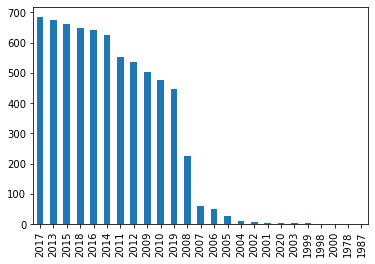

In [25]:
df_novo['Data de lançamento'].dt.year.value_counts(ascending=False).plot.bar()

In [26]:
df_novo['Renda (R$) no ano de exibição'] = df_novo['Renda (R$) no ano de exibição'].astype('float')

In [27]:
df_novo[df_novo['Renda (R$) no ano de exibição'] == df_novo['Renda (R$) no ano de exibição'].max()]

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
662,2019,Vingadores: Ultimato,E1900107800000,Ficção,Estados Unidos,Estrangeira,2019-04-25,Disney,Distribuição Internacional,19656467,338624881.0


In [28]:
df_novo.nlargest(3,'Renda (R$) no ano de exibição')

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
662,2019,Vingadores: Ultimato,E1900107800000,Ficção,Estados Unidos,Estrangeira,2019-04-25,Disney,Distribuição Internacional,19656467,338624881.0
472,2019,O Rei Leão,E1900267700000,Ficção,Estados Unidos,Estrangeira,2019-07-18,Disney,Distribuição Internacional,16242804,265786968.0
1375,2018,Vingadores: Guerra Infinita,E1800067100000,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,14501280,238020232.0


In [29]:
df_novo[df_novo['Renda (R$) no ano de exibição'] == df_novo['Renda (R$) no ano de exibição'].min()]

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
849,2018,Colo*,E1700484800000,Ficção,Portugal,Estrangeira,2017-11-16,Zeta Filmes,Distribuição Nacional,0,0.0
862,2018,Coragem! As Muitas Vidas do Cardeal Dom Paulo ...,B1700537400000,Documentário,Brasil,Brasileira,2017-12-14,TV Meio Ambiente,Distribuição Nacional,0,0.0
996,2018,Jesus - A Esperança*,B1700447200000,Ficção,Brasil,Brasileira,2017-12-14,Moro Comunicação,Distribuição Nacional,0,0.0
1030,2018,Macaco Tião - O Candidato do Povo*,B1700051900000,Documentário,Brasil,Brasileira,2017-12-14,Pipa Produções,Distribuição Nacional,0,0.0
1211,2018,Pai em Dose Dupla 2*,E1700496000000,Ficção,Estados Unidos,Estrangeira,2017-11-23,Paramount,Distribuição Internacional,0,0.0
1281,2018,Silêncio no Estúdio*,B1700602500000,Documentário,Brasil,Brasileira,2017-12-14,Modo Operante Produções,Distribuição Nacional,0,0.0
3667,2014,A Batalha do passinho,B1301805800000,Documentário,Brasil,Brasileira,2013-10-11,Cine Santa Teresa,Distribuição Nacional,355,0.0
6120,2010,Cine Cocoricó: As Aventuras na Cidade,B0901055900000,Ficção,Brasil,Brasileira,2009-07-17,Moviemobz,Distribuição Nacional,1,0.0
6408,2010,Simonal - Ninguém Sabe o Duro que Dei,B0901010000000,Documentário,Brasil,Brasileira,2009-05-15,Moviemobz/RioFilme,Distribuição Nacional,1,0.0


In [35]:
df_novo['Nacionalidade da obra'].value_counts()

Estrangeira    4752
Brasileira     2101
Name: Nacionalidade da obra, dtype: int64